In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
#import os
#import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rcParams['pdf.fonttype'] = 42

ipd_m4C_all_gene.csv is a processed dataframe

In [2]:
ipd = pd.read_csv("ipd_m4C_all_gene.csv", index_col=0)
ipd

,start,strand,D0A,D0B,D0C,D1A,D1B,D1C,D2A,D2B,...,D3B,D3C,D4A,D4B,D4C,gene_ID,gene_start,gene_end,spearman_corr,spearman_p
78,78,+,1.39,1.34,1.38,1.00,1.33,1.41,1.42,1.00,...,1.38,1.00,1.37,1.00,1.34,SAUSA300_RS00010,617,1978,-0.303317,0.271778
207,207,+,1.68,1.63,1.67,1.57,1.59,1.64,1.55,1.52,...,1.66,1.61,1.59,1.61,1.61,SAUSA300_RS00010,617,1978,-0.258492,0.352253
275,275,-,1.53,1.00,1.00,1.55,1.53,1.54,1.00,1.00,...,1.00,1.00,1.56,1.50,1.51,SAUSA300_RS14700,2888101,2888238,0.051806,0.854516
387,387,-,1.43,1.44,1.42,1.43,1.35,1.39,1.42,1.38,...,1.45,1.34,1.42,1.41,1.42,SAUSA300_RS14700,2888101,2888238,-0.187505,0.503382
543,543,-,1.46,1.45,1.00,1.47,1.00,1.00,1.46,1.48,...,1.00,1.45,1.00,1.00,1.00,SAUSA300_RS14700,2888101,2888238,-0.363948,0.182346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779836,2779836,-,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.33,SAUSA300_RS14195,2777669,2779549,0.377964,0.164823
2782192,2782192,+,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.31,SAUSA300_RS14255,2786712,2788136,0.377964,0.164823
2808779,2808779,+,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.38,SAUSA300_RS14345,2811363,2813222,0.377964,0.164823
2838985,2838985,-,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.28,SAUSA300_RS14435,2838560,2839327,0.377964,0.164823


This is how we generated the ipd_m4C_all_gene.csv

In [2]:
ipd = pd.read_csv("ipd_m4C_all.csv", index_col=0)
ipd

,start,strand,D0A,D0B,D0C,D1A,D1B,D1C,D2A,D2B,D2C,D3A,D3B,D3C,D4A,D4B,D4C
78,78,+,1.39,1.34,1.38,1.00,1.33,1.41,1.42,1.00,1.36,1.30,1.38,1.00,1.37,1.00,1.34
207,207,+,1.68,1.63,1.67,1.57,1.59,1.64,1.55,1.52,1.67,1.67,1.66,1.61,1.59,1.61,1.61
275,275,-,1.53,1.00,1.00,1.55,1.53,1.54,1.00,1.00,1.00,1.52,1.00,1.00,1.56,1.50,1.51
387,387,-,1.43,1.44,1.42,1.43,1.35,1.39,1.42,1.38,1.39,1.40,1.45,1.34,1.42,1.41,1.42
543,543,-,1.46,1.45,1.00,1.47,1.00,1.00,1.46,1.48,1.00,1.00,1.00,1.45,1.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779836,2779836,-,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.33
2782192,2782192,+,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.31
2808779,2808779,+,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.38
2838985,2838985,-,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.28


In [96]:
# grab the raw block you’re scaling
mat = ipd.iloc[:, 2:17].astype(float)

# 1a. Any NaNs?
nans_per_row = mat.isna().sum(axis=1)

# 1b. Any infinite values?
infs_per_row = np.isinf(mat.values).sum(axis=1)

# 1c. Any zero-variance rows?
zero_var = mat.std(axis=1) == 0

# Combine into a mask
bad = (nans_per_row > 0) | (infs_per_row > 0) | zero_var
sum(bad)

0

In [97]:
ipd_scaled = mat.apply(lambda x: (x - np.mean(x)) / np.std(x), 1)
ipd_scaled 

,D0A,D0B,D0C,D1A,D1B,D1C,D2A,D2B,D2C,D3A,D3B,D3C,D4A,D4B,D4C
78,0.742799,0.438373,0.681913,-1.631721,0.377488,0.864569,0.925454,-1.631721,0.560143,0.194832,0.681913,-1.631721,0.621028,-1.631721,0.438373
207,1.329114,0.257248,1.114741,-1.028992,-0.600245,0.471621,-1.457738,-2.100858,1.114741,1.114741,0.900368,-0.171499,-0.600245,-0.171499,-0.171499
275,0.934168,-1.067621,-1.067621,1.009707,0.934168,0.971938,-1.067621,-1.067621,-1.067621,0.896398,-1.067621,-1.067621,1.047477,0.820859,0.858629
387,0.792406,1.122575,0.462237,0.792406,-1.848947,-0.528271,0.462237,-0.858440,-0.528271,-0.198101,1.452744,-2.179116,0.462237,0.132068,0.462237
543,1.216834,1.172639,-0.816133,1.261029,-0.816133,-0.816133,1.216834,1.305224,-0.816133,-0.816133,-0.816133,1.172639,-0.816133,-0.816133,-0.816133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779836,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,3.741657
2782192,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,3.741657
2808779,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,3.741657
2838985,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,-0.267261,3.741657


## Correlation test

In [7]:
from scipy.stats import spearmanr
def row_correlation(row):
    # Perform Pearson correlation between the row and the predefined list
    corr_value, p_value = spearmanr(row, predefined_list)
    return corr_value, p_value  # You can return corr_value if you want the correlation coefficient instead

In [ ]:
from scipy.stats import spearmanr
# Predefined list for correlation
predefined_list = [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]
# Apply the function row-wise and get p-values
ipd[['spearman_corr', 'spearman_p']] = mat.apply(lambda row: pd.Series(row_correlation(row)), axis=1)
#ipd['anova_p_value'] = mat.apply(anova_test, axis=1)
# Filter rows where the correlation p-value is below a significance level, e.g., 0.05
alpha = 0.05
df_significant = ipd[ipd['spearman_p'] < alpha]
df_significant

,start,strand,D0A,D0B,D0C,D1A,D1B,D1C,D2A,D2B,D2C,D3A,D3B,D3C,D4A,D4B,D4C,spearman_corr,spearman_p
1982,1982,-,1.90,1.88,1.88,1.89,1.90,1.83,1.85,1.94,1.91,1.88,1.91,1.90,1.91,1.92,1.91,0.560075,0.029903
14306,14306,-,1.37,1.37,1.38,1.36,1.38,1.35,1.34,1.36,1.38,1.36,1.35,1.00,1.35,1.00,1.35,-0.683333,0.004980
15305,15305,+,1.30,1.00,1.28,1.32,1.29,1.30,1.00,1.00,1.00,1.00,1.00,1.00,1.28,1.00,1.00,-0.524332,0.044805
19082,19082,+,1.54,1.54,1.56,1.55,1.62,1.57,1.66,1.57,1.59,1.57,1.63,1.59,1.59,1.62,1.62,0.662387,0.007131
23774,23774,-,1.58,1.57,1.53,1.60,1.55,1.58,1.54,1.53,1.54,1.00,1.56,1.00,1.00,1.53,1.55,-0.562003,0.029223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038387,2038387,-,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.40,1.42,0.553283,0.032396
2102820,2102820,+,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.53,1.50,0.553283,0.032396
2374330,2374330,-,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.63,1.58,0.553283,0.032396
2452142,2452142,-,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.79,1.84,0.553283,0.032396


/Users/peien/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


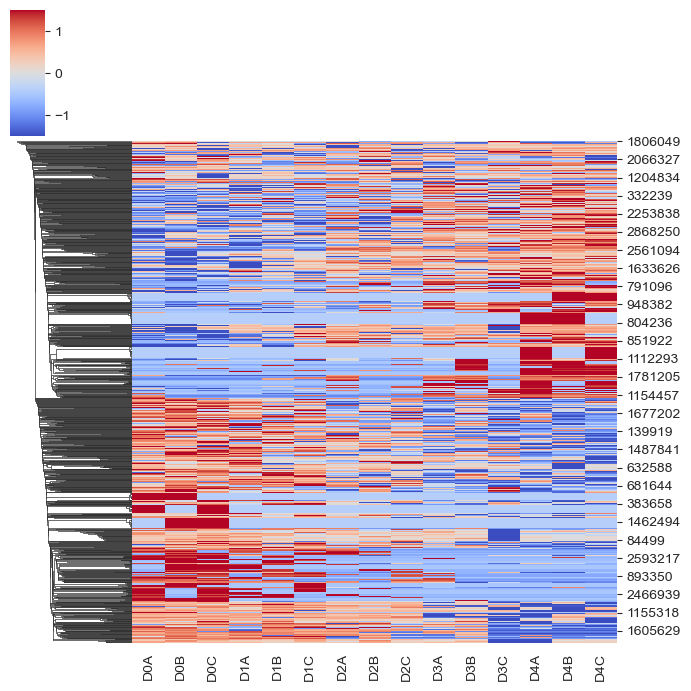

In [26]:
sns.clustermap(ipd_scaled.loc[df_significant.index], 
               col_cluster=False,cmap="coolwarm", method="single", vmin=-1.5, vmax=1.5, figsize=(7,7))
plt.savefig("clustermap_e01234_m4C_ipd_spearman_significant.pdf")

In [5]:
ipd_demethy = ipd.loc[df_significant[df_significant['spearman_corr']<0].index]
ipd_demethy

,start,strand,D0A,D0B,D0C,D1A,D1B,D1C,D2A,D2B,D2C,D3A,D3B,D3C,D4A,D4B,D4C,spearman_corr,spearman_p
14306,14306,-,1.37,1.37,1.38,1.36,1.38,1.35,1.34,1.36,1.38,1.36,1.35,1.00,1.35,1.00,1.35,-0.683333,0.004980
15305,15305,+,1.30,1.00,1.28,1.32,1.29,1.30,1.00,1.00,1.00,1.00,1.00,1.00,1.28,1.00,1.00,-0.524332,0.044805
23774,23774,-,1.58,1.57,1.53,1.60,1.55,1.58,1.54,1.53,1.54,1.00,1.56,1.00,1.00,1.53,1.55,-0.562003,0.029223
31597,31597,+,1.85,1.86,1.84,1.94,1.83,1.88,1.84,1.77,1.83,1.83,1.79,1.78,1.79,1.79,1.78,-0.743151,0.001499
34319,34319,-,1.43,1.47,1.44,1.00,1.43,1.41,1.42,1.40,1.43,1.44,1.41,1.44,1.00,1.00,1.00,-0.527290,0.043397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2659813,2659813,-,1.00,1.72,1.71,1.68,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,-0.600537,0.017920
2730561,2730561,+,1.00,1.53,1.52,1.00,1.49,1.00,1.00,1.52,1.48,1.00,1.00,1.00,1.00,1.00,1.00,-0.539827,0.037792
2784151,2784151,-,1.00,1.34,1.35,1.32,1.33,1.37,1.34,1.38,1.36,1.00,1.00,1.00,1.00,1.00,1.00,-0.552601,0.032655
2805131,2805131,+,1.00,1.33,1.32,1.32,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,-0.593822,0.019596


In [13]:
ipd_methy = ipd.loc[df_significant[df_significant['spearman_corr']>0].index]
ipd_methy

,start,strand,D0A,D0B,D0C,D1A,D1B,D1C,D2A,D2B,...,D3B,D3C,D4A,D4B,D4C,gene_ID,gene_start,gene_end,spearman_corr,spearman_p
1982,1982,-,1.90,1.88,1.88,1.89,1.90,1.83,1.85,1.94,...,1.91,1.90,1.91,1.92,1.91,SAUSA300_RS14700,2888101,2888238,0.560075,0.029903
19082,19082,+,1.54,1.54,1.56,1.55,1.62,1.57,1.66,1.57,...,1.63,1.59,1.59,1.62,1.62,SAUSA300_RS00075,18418,20385,0.662387,0.007131
28234,28234,+,1.76,1.70,1.55,1.66,1.72,1.71,1.66,1.67,...,1.72,1.81,1.72,1.76,1.77,SAUSA300_RS00115,27558,28892,0.529426,0.042401
38751,38751,-,1.36,1.38,1.00,1.00,1.36,1.00,1.39,1.35,...,1.43,1.45,1.38,1.42,1.41,SAUSA300_RS00145,35950,36624,0.614865,0.014714
50647,50647,+,1.41,1.43,1.46,1.43,1.45,1.36,1.44,1.41,...,1.54,1.43,1.47,1.47,1.50,SAUSA300_RS00220,51415,52464,0.543497,0.036258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038387,2038387,-,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.40,1.42,SAUSA300_RS10160,2037829,2039085,0.553283,0.032396
2102820,2102820,+,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.53,1.50,SAUSA300_RS10530,2103042,2103491,0.553283,0.032396
2374330,2374330,-,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.63,1.58,SAUSA300_RS12020,2373481,2374425,0.553283,0.032396
2452142,2452142,-,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.79,1.84,SAUSA300_RS12515,2450627,2452006,0.553283,0.032396


In [15]:
#load json file
import json
with open('/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/230422_PETRI/scVI_s234/TIGRFAM_main.json', 'r') as file:
    main = json.load(file)
with open('/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/230422_PETRI/scVI_s234/TIGRFAM_sub.json', 'r') as file:
    sub = json.load(file)

In [14]:
from scipy.stats import rankdata

#https://github.com/atarashansky/LightGOEA
def log_factorial(n):
    return np.log(np.arange(1,n+1)).sum()
def log_binomial(n,k):
    return log_factorial(n) - (log_factorial(k) + log_factorial(n-k))

def GOEA(target_genes,GENE_SETS,df_key='GO',goterms=None,fdr_thresh=0.25,p_thresh=1e-3): 
    """Performs GO term Enrichment Analysis using the hypergeometric distribution.
    
    Parameters
    ----------
    target_genes - array-like
        List of target genes from which to find enriched GO terms.
    GENE_SETS - dictionary or pandas.DataFrame
        Dictionary where the keys are GO terms and the values are lists of genes associated with each GO term.
        Ex: {'GO:0000001': ['GENE_A','GENE_B'],
             'GO:0000002': ['GENE_A','GENE_C','GENE_D']}
        Make sure to include all available genes that have GO terms in your dataset.
        
        ---OR---
        
        Pandas DataFrame with genes as the index and GO terms values.
        Ex: 'GENE_A','GO:0000001',
            'GENE_A','GO:0000002',
            'GENE_B','GO:0000001',
            'GENE_B','GO:0000004',
            ...
        If `GENE_SETS` is a pandas DataFrame, the `df_key` parameter should be the name of the column in which
        the GO terms are stored.       
    df_key - str, optional, default 'GO'
        The name of the column in which GO terms are stored. Only used if `GENE_SETS` is a DataFrame.
    goterms - array-list, optional, default None
        If provided, only these GO terms will be tested.
    fdr_thresh - float, optional, default 0.25
        Filter out GO terms with FDR q value greater than this threshold.
    p_thresh - float, optional, default 1e-3
        Filter out GO terms with p value greater than this threshold.
        
    Returns:
    -------
    enriched_goterms - pandas.DataFrame
        A Pandas DataFrame of enriched GO terms with FDR q values, p values, and associated genes provided.
    """    
    
    # identify all genes found in `GENE_SETS`
    
    if isinstance(GENE_SETS,pd.DataFrame):
        print('Converting DataFrame into dictionary')
        genes = np.array(list(GENE_SETS.index))
        agt = np.array(list(GENE_SETS[df_key].values))
        idx = np.argsort(agt)
        genes = genes[idx]
        agt = agt[idx]
        bounds = np.where(agt[:-1]!=agt[1:])[0]+1
        bounds = np.append(np.append(0,bounds),agt.size)
        bounds_left=bounds[:-1]
        bounds_right=bounds[1:]
        genes_lists = [genes[bounds_left[i]:bounds_right[i]] for i in range(bounds_left.size)]
        GENE_SETS = dict(zip(np.unique(agt),genes_lists))
    all_genes = np.unique(np.concatenate(list(GENE_SETS.values())))
    all_genes = np.array(all_genes)
    
    # if goterms is None, use all the goterms found in `GENE_SETS`
    if goterms is None:
        goterms = np.unique(list(GENE_SETS.keys()))
    else:
        goterms = goterms[np.in1d(goterms,np.unique(list(GENE_SETS.keys())))]
    
    # ensure that target genes are all present in `all_genes`
    _,ix = np.unique(target_genes,return_index=True)
    target_genes=target_genes[np.sort(ix)]
    target_genes = target_genes[np.in1d(target_genes,all_genes)]
    
    # N -- total number of genes
    # N = all_genes.size
    N = 3008

    probs=[]
    probs_genes=[]
    counter=0
    # for each go term,
    for goterm in goterms:
        if counter%1000==0:
            print(counter)
        counter+=1
        
        # identify genes associated with this go term
        gene_set = np.array(GENE_SETS[goterm])
        
        # B -- number of genes associated with this go term
        B = gene_set.size
        
        # b -- number of genes in target associated with this go term
        gene_set_in_target = gene_set[np.in1d(gene_set,target_genes)]
        b = gene_set_in_target.size        
        if b != 0:
            # calculate the enrichment probability as the cumulative sum of the tail end of a hypergeometric distribution
            # with parameters (N,B,n,b)
            n = target_genes.size
            num_iter = min(n,B)
            rng = np.arange(b,num_iter+1)
            probs.append(sum([np.exp(log_binomial(n,i)+log_binomial(N-n,B-i) - log_binomial(N,B)) for i in rng]))
        else:
            probs.append(1.0)
        
        #append associated genes to a list
        probs_genes.append(gene_set_in_target)
        
    probs = np.array(probs)    
    
    # adjust p value to correct for multiple testing
    fdr_q_probs = probs.size*probs / rankdata(probs,method='ordinal')
    
    # filter out go terms based on the FDR q value and p value thresholds
    filt = np.logical_and(fdr_q_probs<fdr_thresh,probs<p_thresh)
    enriched_goterms = goterms[filt]
    p_values = probs[filt]
    fdr_q_probs = fdr_q_probs[filt]    
    probs_genes = [probs_genes[i] for i in range(len(probs_genes)) if filt[i]]
    
    # construct the Pandas DataFrame
    gns = []
    for i in probs_genes:
        gns.append(';'.join(i))
    gns = np.array(gns)
    enriched_goterms = pd.DataFrame(data=fdr_q_probs,index=enriched_goterms,columns=['fdr_q_value'])
    enriched_goterms['p_value'] = p_values
    enriched_goterms['genes'] = gns
    
    # sort in ascending order by the p value
    enriched_goterms = enriched_goterms.sort_values('p_value')   
    return enriched_goterms

## Gene annotation

In [3]:
ipd

,start,strand,D0A,D0B,D0C,D1A,D1B,D1C,D2A,D2B,D2C,D3A,D3B,D3C,D4A,D4B,D4C
78,78,+,1.39,1.34,1.38,1.00,1.33,1.41,1.42,1.00,1.36,1.30,1.38,1.00,1.37,1.00,1.34
207,207,+,1.68,1.63,1.67,1.57,1.59,1.64,1.55,1.52,1.67,1.67,1.66,1.61,1.59,1.61,1.61
275,275,-,1.53,1.00,1.00,1.55,1.53,1.54,1.00,1.00,1.00,1.52,1.00,1.00,1.56,1.50,1.51
387,387,-,1.43,1.44,1.42,1.43,1.35,1.39,1.42,1.38,1.39,1.40,1.45,1.34,1.42,1.41,1.42
543,543,-,1.46,1.45,1.00,1.47,1.00,1.00,1.46,1.48,1.00,1.00,1.00,1.45,1.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779836,2779836,-,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.33
2782192,2782192,+,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.31
2808779,2808779,+,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.38
2838985,2838985,-,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.28


In [7]:
D0C = pd.read_csv("/Users/peien/Dropbox (NYU Langone Health)/Pacbio seq/230731/methy/D0C_3017gene.csv", index_col=0)
D0C

,seqid,source,type,start,end,score,strand,phase,ID,coverage,sequence_ID,extra_copy_number,copy_num_ID
1,ctg.s1.000000F,Liftoff,gene,617,1978,.,+,.,SAUSA300_RS00010,1.0,1.000,0,SAUSA300_RS00010_0
2,ctg.s1.000000F,Liftoff,gene,2256,3389,.,+,.,SAUSA300_RS00015,1.0,1.000,0,SAUSA300_RS00015_0
3,ctg.s1.000000F,Liftoff,gene,3770,4015,.,+,.,SAUSA300_RS00020,1.0,1.000,0,SAUSA300_RS00020_0
4,ctg.s1.000000F,Liftoff,gene,4012,5124,.,+,.,SAUSA300_RS00025,1.0,0.999,0,SAUSA300_RS00025_0
5,ctg.s1.000000F,Liftoff,gene,5134,7068,.,+,.,SAUSA300_RS00030,1.0,1.000,0,SAUSA300_RS00030_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,ctg.s1.000000F,Liftoff,gene,2883446,2884165,.,-,.,SAUSA300_RS14680,1.0,1.000,0,SAUSA300_RS14680_0
3005,ctg.s1.000000F,Liftoff,gene,2884165,2886042,.,-,.,SAUSA300_RS14685,1.0,1.000,0,SAUSA300_RS14685_0
3006,ctg.s1.000000F,Liftoff,gene,2886109,2887488,.,-,.,SAUSA300_RS14690,1.0,1.000,0,SAUSA300_RS14690_0
3007,ctg.s1.000000F,Liftoff,gene,2887627,2887980,.,-,.,SAUSA300_RS14695,1.0,1.000,0,SAUSA300_RS14695_0


In [ ]:
from bisect import bisect_left, bisect_right

# Assuming you have your dataframes defined already as `ipd` and `D0C`
# Let's sort `D0C` by 'start'
D0C = D0C.sort_values(by=['start'])

# Function to find closest gene
def find_closest_tu(pos, strand):
    same_strand_tu = D0C[D0C['strand'] == strand]
    
    # First, find if the position is within a gene
    for _, tu in same_strand_tu.iterrows():
        if tu['start'] <= pos <= tu['end']:
            return pd.Series([tu['ID'], tu['start'], tu['end']])
    
    # If not found within a gene, find the closest next one
    if strand == '+':
        tu_starts = same_strand_tu['start'].tolist()
        position = bisect_left(tu_starts, pos)
        
        # If pos is greater than any transcription start
        if position == len(tu_starts):
            # Return the first tu in circular DNA
            tu = same_strand_tu.iloc[0]
        else:
            # The transcription unit starting at or after the position
            tu = same_strand_tu.iloc[position]
        return pd.Series([tu['ID'], tu['start'], tu['end']])
    else:  # If strand is "-"
        tu_ends = same_strand_tu['end'].tolist()
        position = bisect_right(tu_ends, pos)
        
        # If pos is smaller than any transcription end
        if position == 0:
            # Return the last tu in circular DNA
            tu = same_strand_tu.iloc[-1]
        else:
            # The transcription unit ending at or before the position
            tu = same_strand_tu.iloc[position-1]
        return pd.Series([tu['ID'], tu['start'], tu['end']])

# Apply function to ipd dataframe
ipd[['gene_ID', 'gene_start', 'gene_end']] = ipd.apply(lambda row: find_closest_tu(row['start'], row['strand']), axis=1)
ipd

,start,strand,D0A,D0B,D0C,D1A,D1B,D1C,D2A,D2B,D2C,D3A,D3B,D3C,D4A,D4B,D4C,gene_ID,gene_start,gene_end
78,78,+,1.39,1.34,1.38,1.00,1.33,1.41,1.42,1.00,1.36,1.30,1.38,1.00,1.37,1.00,1.34,SAUSA300_RS00010,617,1978
207,207,+,1.68,1.63,1.67,1.57,1.59,1.64,1.55,1.52,1.67,1.67,1.66,1.61,1.59,1.61,1.61,SAUSA300_RS00010,617,1978
275,275,-,1.53,1.00,1.00,1.55,1.53,1.54,1.00,1.00,1.00,1.52,1.00,1.00,1.56,1.50,1.51,SAUSA300_RS14700,2888101,2888238
387,387,-,1.43,1.44,1.42,1.43,1.35,1.39,1.42,1.38,1.39,1.40,1.45,1.34,1.42,1.41,1.42,SAUSA300_RS14700,2888101,2888238
543,543,-,1.46,1.45,1.00,1.47,1.00,1.00,1.46,1.48,1.00,1.00,1.00,1.45,1.00,1.00,1.00,SAUSA300_RS14700,2888101,2888238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779836,2779836,-,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.33,SAUSA300_RS14195,2777669,2779549
2782192,2782192,+,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.31,SAUSA300_RS14255,2786712,2788136
2808779,2808779,+,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.38,SAUSA300_RS14345,2811363,2813222
2838985,2838985,-,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.28,SAUSA300_RS14435,2838560,2839327


In [61]:
ipd.to_csv("ipd_m4C_all_gene.csv")

## Map gene ID and gene names

In [156]:
#map gene_IDs to gene names
import json
with open('/Users/peien/NYU Langone Health Dropbox/Peien Jiang/evolution/new_230422_PETRI/e0234/gene_rename.json', 'r') as f:
    rename_dict = json.load(f)
rename_dict

{'SAUSA300_RS00010': 'dnaA',
 'SAUSA300_RS00015': 'dnaN',
 'SAUSA300_RS00020': 'SAUSA300_RS00020',
 'SAUSA300_RS00025': 'recF',
 'SAUSA300_RS00030': 'gyrB',
 'SAUSA300_RS00035': 'gyrA',
 'SAUSA300_RS00040': 'nnrD',
 'SAUSA300_RS00045': 'hutH',
 'SAUSA300_RS14945': 'SAUSA300_RS14945',
 'SAUSA300_RS00050': 'serS',
 'SAUSA300_RS00055': 'SAUSA300_RS00055',
 'SAUSA300_RS00060': 'SAUSA300_RS00060',
 'SAUSA300_RS00065': 'metX',
 'SAUSA300_RS00070': 'SAUSA300_RS00070',
 'SAUSA300_RS00075': 'gdpP',
 'SAUSA300_RS00080': 'rplI',
 'SAUSA300_RS00085': 'dnaC',
 'SAUSA300_RS14950': 'SAUSA300_RS14950',
 'SAUSA300_RS00090': 'purA',
 'SAUSA300_RS00095': 'SAUSA300_RS00095',
 'SAUSA300_RS00100': 'SAUSA300_RS00100',
 'SAUSA300_RS00105': 'walR',
 'SAUSA300_RS00110': 'walK',
 'SAUSA300_RS00115': 'walH',
 'SAUSA300_RS00120': 'walI',
 'SAUSA300_RS00125': 'walJ',
 'SAUSA300_RS00130': 'adsA',
 'SAUSA300_RS00135': 'orfX',
 'SAUSA300_RS00140': 'SAUSA300_RS00140',
 'SAUSA300_RS00145': 'SAUSA300_RS00145',
 'SAUSA300

In [158]:
ipd['gene_name'] = [rename_dict.get(col, col) for col in ipd['gene_ID']]
ipd

,start,strand,D0A,D0B,D0C,D1A,D1B,D1C,D2A,D2B,...,D3C,D4A,D4B,D4C,gene_ID,gene_start,gene_end,spearman_corr,spearman_p,gene_name
78,78,+,1.39,1.34,1.38,1.00,1.33,1.41,1.42,1.00,...,1.00,1.37,1.00,1.34,SAUSA300_RS00010,617,1978,-0.303317,0.271778,dnaA
207,207,+,1.68,1.63,1.67,1.57,1.59,1.64,1.55,1.52,...,1.61,1.59,1.61,1.61,SAUSA300_RS00010,617,1978,-0.258492,0.352253,dnaA
275,275,-,1.53,1.00,1.00,1.55,1.53,1.54,1.00,1.00,...,1.00,1.56,1.50,1.51,SAUSA300_RS14700,2888101,2888238,0.051806,0.854516,rpmH
387,387,-,1.43,1.44,1.42,1.43,1.35,1.39,1.42,1.38,...,1.34,1.42,1.41,1.42,SAUSA300_RS14700,2888101,2888238,-0.187505,0.503382,rpmH
543,543,-,1.46,1.45,1.00,1.47,1.00,1.00,1.46,1.48,...,1.45,1.00,1.00,1.00,SAUSA300_RS14700,2888101,2888238,-0.363948,0.182346,rpmH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779836,2779836,-,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.33,SAUSA300_RS14195,2777669,2779549,0.377964,0.164823,cysJ
2782192,2782192,+,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.31,SAUSA300_RS14255,2786712,2788136,0.377964,0.164823,phoB
2808779,2808779,+,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.38,SAUSA300_RS14345,2811363,2813222,0.377964,0.164823,SAUSA300_RS14345
2838985,2838985,-,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.28,SAUSA300_RS14435,2838560,2839327,0.377964,0.164823,cap1C


## Log (r4/r1) distributions

In [276]:
ipd['log(r4/r1)_A'] = np.log2(ipd['D4A']/ipd['D1A'])
ipd['log(r4/r1)_B'] = np.log2(ipd['D4B']/ipd['D1B'])
ipd['log(r4/r1)_C'] = np.log2(ipd['D4C']/ipd['D1C'])
ipd

,start,strand,D0A,D0B,D0C,D1A,D1B,D1C,D2A,D2B,...,spearman_p,gene_name,log(r4/r1)_A,log(r4/r1)_B,log(r4/r1)_C,mean_log(r4/r1),log(r4/r0)_A,log(r4/r0)_B,log(r4/r0)_C,mean_log(r4/r0)
78,78,+,1.39,1.34,1.38,1.00,1.33,1.41,1.42,1.00,...,0.271778,dnaA,0.454176,-0.411426,-0.073462,-0.005989,-0.012124,-0.226509,-0.024453,-0.087695
207,207,+,1.68,1.63,1.67,1.57,1.59,1.64,1.55,1.52,...,0.352253,dnaA,0.018262,0.018034,-0.026635,0.001931,-0.049281,-0.011013,-0.032790,-0.031028
275,275,-,1.53,1.00,1.00,1.55,1.53,1.54,1.00,1.00,...,0.854516,rpmH,0.009278,-0.028569,-0.028382,-0.009568,0.017006,0.321928,0.327687,0.222207
387,387,-,1.43,1.44,1.42,1.43,1.35,1.39,1.42,1.38,...,0.503382,rpmH,-0.010124,0.062736,0.030806,0.016140,-0.005949,-0.017848,0.000000,-0.007932
543,543,-,1.46,1.45,1.00,1.47,1.00,1.00,1.46,1.48,...,0.182346,rpmH,-0.555816,0.000000,0.000000,-0.101504,-0.298658,-0.292782,0.000000,-0.197147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779836,2779836,-,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.164823,cysJ,0.000000,0.000000,0.411426,0.073443,0.000000,0.000000,0.220330,0.073443
2782192,2782192,+,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.164823,phoB,0.000000,0.000000,0.389567,0.069298,0.000000,0.000000,0.207893,0.069298
2808779,2808779,+,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.164823,SAUSA300_RS14345,0.000000,0.000000,0.464668,0.083654,0.000000,0.000000,0.250962,0.083654
2838985,2838985,-,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.164823,cap1C,0.000000,0.000000,0.356144,0.063011,0.000000,0.000000,0.189034,0.063011


In [277]:
ipd['mean_log(r4/r1)'] = ipd[['log(r4/r1)_A','log(r4/r1)_B','log(r4/r1)_C']].mean(axis=1)
ipd

,start,strand,D0A,D0B,D0C,D1A,D1B,D1C,D2A,D2B,...,spearman_p,gene_name,log(r4/r1)_A,log(r4/r1)_B,log(r4/r1)_C,mean_log(r4/r1),log(r4/r0)_A,log(r4/r0)_B,log(r4/r0)_C,mean_log(r4/r0)
78,78,+,1.39,1.34,1.38,1.00,1.33,1.41,1.42,1.00,...,0.271778,dnaA,0.454176,-0.411426,-0.073462,-0.010238,-0.012124,-0.226509,-0.024453,-0.087695
207,207,+,1.68,1.63,1.67,1.57,1.59,1.64,1.55,1.52,...,0.352253,dnaA,0.018262,0.018034,-0.026635,0.003220,-0.049281,-0.011013,-0.032790,-0.031028
275,275,-,1.53,1.00,1.00,1.55,1.53,1.54,1.00,1.00,...,0.854516,rpmH,0.009278,-0.028569,-0.028382,-0.015891,0.017006,0.321928,0.327687,0.222207
387,387,-,1.43,1.44,1.42,1.43,1.35,1.39,1.42,1.38,...,0.503382,rpmH,-0.010124,0.062736,0.030806,0.027806,-0.005949,-0.017848,0.000000,-0.007932
543,543,-,1.46,1.45,1.00,1.47,1.00,1.00,1.46,1.48,...,0.182346,rpmH,-0.555816,0.000000,0.000000,-0.185272,-0.298658,-0.292782,0.000000,-0.197147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2779836,2779836,-,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.164823,cysJ,0.000000,0.000000,0.411426,0.137142,0.000000,0.000000,0.220330,0.073443
2782192,2782192,+,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.164823,phoB,0.000000,0.000000,0.389567,0.129856,0.000000,0.000000,0.207893,0.069298
2808779,2808779,+,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.164823,SAUSA300_RS14345,0.000000,0.000000,0.464668,0.154889,0.000000,0.000000,0.250962,0.083654
2838985,2838985,-,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.164823,cap1C,0.000000,0.000000,0.356144,0.118715,0.000000,0.000000,0.189034,0.063011


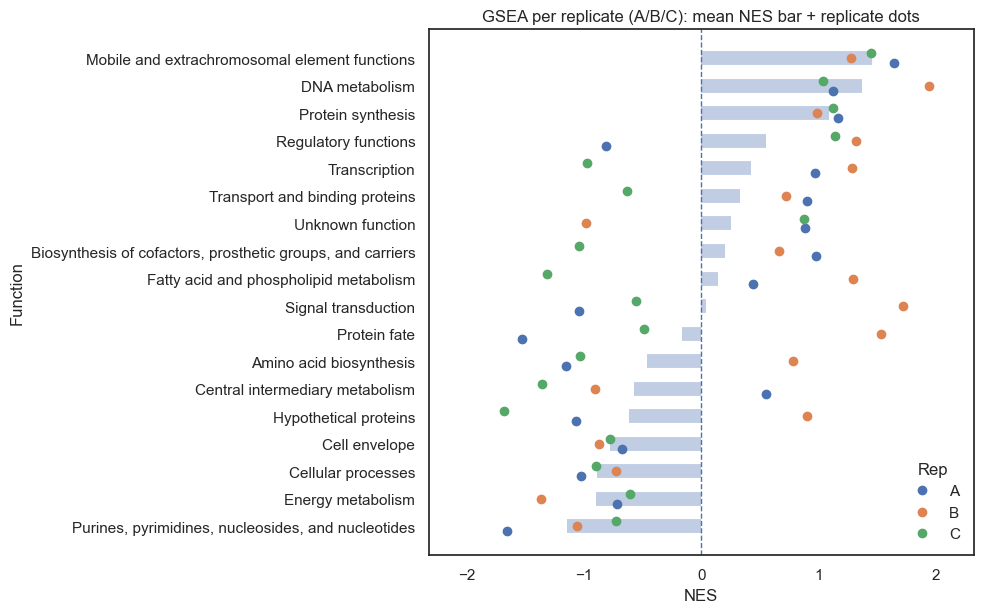

In [316]:
#Look at three replicates separately
# =======================
# Settings
# =======================
gene_col   = "gene_ID"
p_weight   = 0
N_PERM     = 3000
seed       = 1
alpha_fdr  = 0.05

metric_map = {
    "A": "log(r4/r1)_A",
    "B": "log(r4/r1)_B",
    "C": "log(r4/r1)_C",
}

# =======================
# Core GSEA functions (same as yours)
# =======================
def gsea_es(hit_mask: np.ndarray, absw: np.ndarray) -> float:
    Nh = int(hit_mask.sum())
    if Nh == 0 or Nh == len(hit_mask):
        return np.nan

    hit_w = absw * hit_mask
    NR = hit_w.sum()
    if NR == 0:
        Phit = hit_mask.astype(float) / Nh
    else:
        Phit = hit_w / NR

    Pmiss = (~hit_mask).astype(float) / (len(hit_mask) - Nh)
    running = np.cumsum(Phit - Pmiss)

    max_es = running.max()
    min_es = running.min()
    return max_es if abs(max_es) >= abs(min_es) else min_es

def null_es_distribution(N: int, Nh: int, absw: np.ndarray, nperm: int, rng) -> np.ndarray:
    null = np.empty(nperm, dtype=float)
    for b in range(nperm):
        hit_idx = rng.choice(N, size=Nh, replace=False)
        hit_mask = np.zeros(N, dtype=bool)
        hit_mask[hit_idx] = True
        null[b] = gsea_es(hit_mask, absw)
    return null

def nes_from_null(obs: float, null: np.ndarray) -> float:
    if obs >= 0:
        pos = null[null >= 0]
        denom = pos.mean() if len(pos) else np.mean(np.abs(null))
        return obs / denom if denom != 0 else np.nan
    else:
        neg = null[null < 0]
        denom = np.abs(neg.mean()) if len(neg) else np.mean(np.abs(null))
        return obs / denom if denom != 0 else np.nan

def bh_fdr(pvals: np.ndarray) -> np.ndarray:
    pvals = np.asarray(pvals, dtype=float)
    m = len(pvals)
    idx = np.argsort(pvals)
    p_sorted = pvals[idx]
    q_sorted = p_sorted * m / (np.arange(1, m + 1))
    q_sorted = np.minimum.accumulate(q_sorted[::-1])[::-1]
    q = np.empty_like(q_sorted)
    q[idx] = np.clip(q_sorted, 0, 1)
    return q

# =======================
# Run GSEA for one metric col
# =======================
def run_gsea_one_metric(ipd: pd.DataFrame, gene_col: str, metric_col: str, main: dict,
                        p_weight: float, N_PERM: int, seed: int, alpha_fdr: float,
                        min_Nh: int = 5) -> pd.DataFrame:

    rng = np.random.default_rng(seed)

    df = ipd[[gene_col, metric_col]].dropna(subset=[metric_col]).copy()
    df = df.groupby(gene_col, as_index=False)[metric_col].mean()
    df = df.sort_values(metric_col, ascending=False).reset_index(drop=True)

    genes  = df[gene_col].to_numpy()
    metric = df[metric_col].to_numpy()
    N      = len(metric)

    absw = np.abs(metric) ** p_weight  # if p_weight=0 => all ones

    gene_set_cache = {k: set(v) for k, v in main.items()}

    rows = []
    for func, gset in gene_set_cache.items():
        hit_mask = np.fromiter((g in gset for g in genes), dtype=bool, count=len(genes))
        Nh = int(hit_mask.sum())
        if Nh < min_Nh:
            continue

        obs_es = gsea_es(hit_mask, absw)
        if np.isnan(obs_es):
            continue

        null = null_es_distribution(N, Nh, absw, N_PERM, rng)
        p_emp = (np.sum(np.abs(null) >= np.abs(obs_es)) + 1) / (len(null) + 1)
        nes = nes_from_null(obs_es, null)

        rows.append({"func": func, "Nh": Nh, "ES": float(obs_es), "NES": float(nes), "p_emp": float(p_emp)})

    res = pd.DataFrame(rows)
    if res.empty:
        return res

    res["q_bh"] = bh_fdr(res["p_emp"].to_numpy())
    res["sig"] = res["q_bh"] <= alpha_fdr
    return res

# =======================
# Run A/B/C + merge
# =======================
res_by_rep = {}
for rep, col in metric_map.items():
    res = run_gsea_one_metric(
        ipd=ipd, gene_col=gene_col, metric_col=col, main=main,
        p_weight=p_weight, N_PERM=N_PERM, seed=seed + (ord(rep) - ord("A")),
        alpha_fdr=alpha_fdr, min_Nh=5
    )
    # keep only what we need + rename columns
    res = res[["func", "NES", "p_emp", "q_bh", "Nh", "sig"]].copy()
    res = res.rename(columns={
        "NES":  f"NES_{rep}",
        "p_emp":f"p_{rep}",
        "q_bh": f"q_{rep}",
        "Nh":   f"Nh_{rep}",
        "sig":  f"sig_{rep}",
    })
    res_by_rep[rep] = res

# inner-join on func so we only plot functions present in all 3
merged = res_by_rep["A"].merge(res_by_rep["B"], on="func", how="inner").merge(res_by_rep["C"], on="func", how="inner")

# mean NES across A/B/C
merged["NES_mean"] = merged[[f"NES_{r}" for r in metric_map]].mean(axis=1)

# (optional) an "any significant" flag across A/B/C
merged["sig_any"] = merged[[f"sig_{r}" for r in metric_map]].any(axis=1)

# =======================
# Plot: bar = mean NES, 3 dots = NES_A/B/C
# =======================
plot_df = merged.sort_values("NES_mean").reset_index(drop=True)
order = plot_df["func"].tolist()

fig, ax = plt.subplots(figsize=(10, max(5, 0.35 * len(order))))

# bar (as a thick line) for mean NES
ax.hlines(order, 0, plot_df["NES_mean"], linewidth=10, alpha=0.35)

# 3 dots with small y-jitter so they don't overlap
y = np.arange(len(order))
jit = {"A": -0.18, "B": 0.0, "C": 0.18}
for rep in ["A", "B", "C"]:
    ax.plot(plot_df[f"NES_{rep}"].to_numpy(), y + jit[rep], "o", label=rep)

ax.axvline(0, ls="--", lw=1)
xmax = max(0.2, np.nanmax(np.abs(plot_df[[f"NES_{r}" for r in metric_map] + ["NES_mean"]].to_numpy())))
ax.set_xlim(-xmax * 1.2, xmax * 1.2)

ax.set_yticks(y)
ax.set_yticklabels(order)
ax.set_xlabel("NES")
ax.set_ylabel("Function")
ax.set_title("GSEA per replicate (A/B/C): mean NES bar + replicate dots")
ax.legend(title="Rep", frameon=False, loc="lower right")

# mark functions significant in ANY replicate (optional)
for i, r in enumerate(plot_df.itertuples(index=False)):
    if r.sig_any:
        ax.text(r.NES_mean + 0.03 * np.sign(r.NES_mean if r.NES_mean != 0 else 1),
                i, "*", va="center", fontsize=13, fontweight="bold")

fig.tight_layout()
fig.savefig("gsea_unweighted_meanNES_logr4r1_m4C_with_ABCdots.pdf", bbox_inches="tight")
plt.show()

# merged now contains NES_A/NES_B/NES_C + p/q/Nh per replicate + NES_mean
#merged

Look at m4C sites in TIGRFAM purine/pyrimidine pathway specificaly

/var/folders/51/n69nfv650kj287fzxg37b8r80000gn/T/ipykernel_12580/981532817.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("tab20c")  # try: tab10/tab20/Set2/Dark2
/var/folders/51/n69nfv650kj287fzxg37b8r80000gn/T/ipykernel_12580/981532817.py:139: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


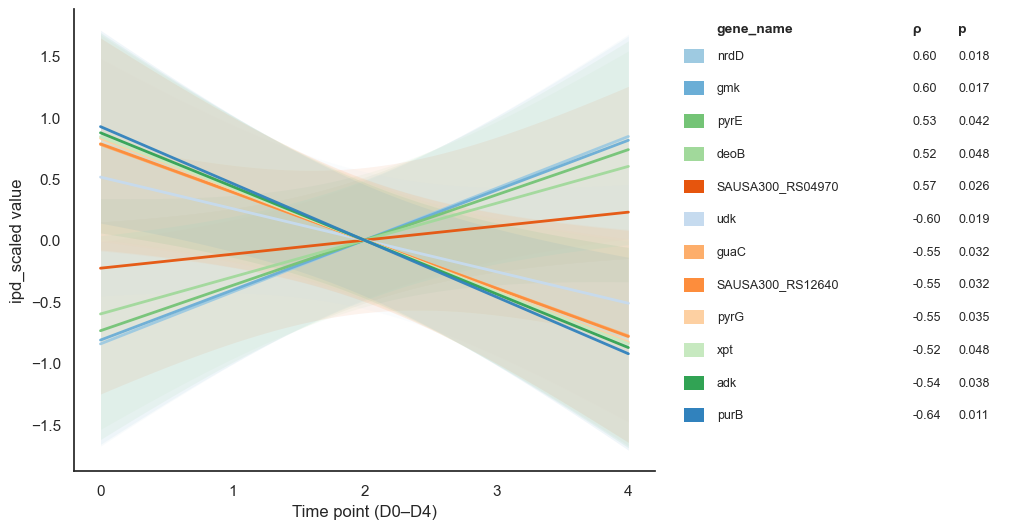

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
from scipy.stats import linregress
import scipy.stats as st
import matplotlib.cm as cm

# ---- settings ----
cols = ["D0A","D0B","D0C","D1A","D1B","D1C","D2A","D2B","D2C","D3A","D3B","D3C","D4A","D4B","D4C"]
x = np.array([0,0,0, 1,1,1, 2,2,2, 3,3,3, 4,4,4], dtype=float)

alpha_band = 0.07
line_lw = 2

# choose a palette for distinct lines (categorical)
cmap = cm.get_cmap("tab20c")  # try: tab10/tab20/Set2/Dark2

# ---- subset and align ----
subset = ipd[(ipd["spearman_p"] < 0.05) &
             (ipd["gene_ID"].isin(main["Purines, pyrimidines, nucleosides, and nucleotides"]))].copy()
#if some rows share the same gene_ID, only keep the rows with a smaller spearman_p
#subset = subset.sort_values("spearman_p").drop_duplicates(subset=["gene_ID"], keep="first")

X = ipd_scaled.loc[subset.index, cols].copy()

# ---- make figure with a side annotation panel ----
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 2, width_ratios=[3.2, 1.8], wspace=0.05)
ax = fig.add_subplot(gs[0, 0])       # main plot
ax_anno = fig.add_subplot(gs[0, 1])  # annotation "table"

records = []

# first pass: fit lines + compute CI + store endpoints for sorting
for i, (idx, row) in enumerate(X.iterrows()):
    y = row.to_numpy(dtype=float)
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() < 3:
        continue

    x_m, y_m = x[mask], y[mask]
    res = linregress(x_m, y_m)
    n = mask.sum()
    df = n - 2
    if df <= 0:
        continue

    xx = np.linspace(x_m.min(), x_m.max(), 200)
    yhat = res.intercept + res.slope * xx

    # residual standard error
    y_fit = res.intercept + res.slope * x_m
    s_err = np.sqrt(np.sum((y_m - y_fit)**2) / df)
    xbar = x_m.mean()
    Sxx = np.sum((x_m - xbar)**2)
    if Sxx == 0:
        continue

    tcrit = st.t.ppf(0.975, df)
    se_mean = s_err * np.sqrt(1/n + (xx - xbar)**2 / Sxx)
    lo = yhat - tcrit * se_mean
    hi = yhat + tcrit * se_mean

    gene = str(subset.loc[idx, "gene_name"])
    rho = float(subset.loc[idx, "spearman_corr"])
    pval = float(subset.loc[idx, "spearman_p"])

    color = cmap(i % cmap.N)

    # endpoint at x=4 (or max observed)
    x_end = x_m.max()
    y_end = res.intercept + res.slope * x_end

    records.append(dict(
        idx=idx, gene=gene, rho=rho, p=pval,
        color=color,
        xx=xx, yhat=yhat, lo=lo, hi=hi,
        x_end=x_end, y_end=y_end
    ))

# sort so the annotation panel is readable (top-to-bottom)
records = sorted(records, key=lambda d: d["y_end"], reverse=True)
ordered_idx = [d["idx"] for d in records]               # row order = annotation order
ordered_genes = [d["gene"] for d in records]            # labels in the same order
X_ord = X.loc[ordered_idx, cols].to_numpy(dtype=float)  # heatmap matrix (n_genes x 15)

# plot in sorted order (keeps colors stable & matches panel)
for d in records:
    ax.fill_between(d["xx"], d["lo"], d["hi"], color=d["color"], alpha=alpha_band, linewidth=0)
    ax.plot(d["xx"], d["yhat"], color=d["color"], linewidth=line_lw, alpha=0.95)

# ---- main axis cosmetics ----
ax.set_xlabel("Time point (D0–D4)")
ax.set_ylabel("ipd_scaled value")
ax.set_xticks([0,1,2,3,4])
ax.set_xlim(-0.2, 4.2)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# ---- annotation "table" axis ----
ax_anno.set_axis_off()
ax_anno.set_xlim(0, 1)

n = len(records)
if n == 0:
    plt.show()
    raise SystemExit("No rows after filtering.")

# layout parameters in the annotation panel
y_top = 0.97
y_bottom = 0.05
row_h = (y_top - y_bottom) / (n + 1)  # +1 for header

# column x positions in [0,1] coordinates
x_swatch = 0.02
x_gene   = 0.12
x_rho    = 0.72
x_p      = 0.86

# header row
ax_anno.text(x_gene, y_top, "gene_name", fontsize=10, fontweight="bold", va="top")
ax_anno.text(x_rho,  y_top, "ρ",       fontsize=10, fontweight="bold", va="top")
ax_anno.text(x_p,    y_top, "p",       fontsize=10, fontweight="bold", va="top")

# draw rows
for j, d in enumerate(records):
    y = y_top - (j + 1) * row_h  # start below header

    # color swatch
    ax_anno.add_patch(Rectangle((x_swatch, y - 0.015), 0.06, 0.03,
                               facecolor=d["color"], edgecolor="none"))

    # text
    ax_anno.text(x_gene, y, d["gene"], fontsize=9, va="center")
    ax_anno.text(x_rho,  y, f"{d['rho']:.2f}", fontsize=9, va="center")
    ax_anno.text(x_p,    y, f"{d['p']:.3f}",   fontsize=9, va="center")

plt.tight_layout()
plt.savefig("linregress_purine_pathway_m4C.pdf", bbox_inches="tight")
plt.show()


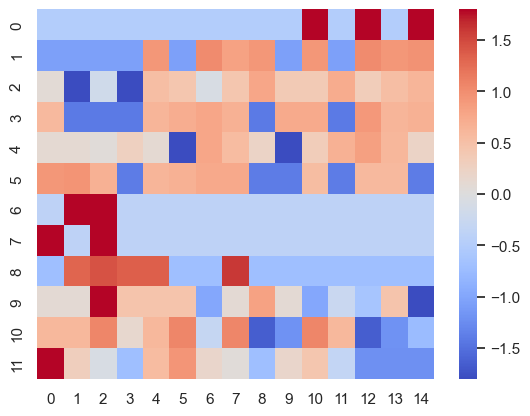

In [417]:
sns.heatmap(X_ord, cmap='coolwarm',
            vmin=-1.8,
            vmax=1.8)
plt.savefig("purine_pathway_m4C_heatmap.pdf")

In [396]:
ipd[(ipd["spearman_p"] < 0.05) &
             (ipd["gene_ID"].isin(main["Purines, pyrimidines, nucleosides, and nucleotides"]))]['gene_name'].unique()

array(['deoB', 'xpt', 'SAUSA300_RS04970', 'pyrE', 'gmk', 'udk', 'purB',
       'adk', 'SAUSA300_RS12640', 'guaC', 'pyrG', 'nrdD'], dtype=object)